In [7]:
text = "평생 살 것 처럼 꿈을 꾸어라. 그리고 내일 죽을 것 처럼 오늘을 살아라."

tokens = [x for x in text.split(' ')]
print(tokens,'\n')
unique= set(tokens)
unique = list(unique)
print(unique,'\n')
token2idx = {}
for i in range(len(unique)):
  token2idx[unique[i]] = i
print(token2idx,'\n')
encode = [token2idx[x] for x in tokens]
encode

['평생', '살', '것', '처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것', '처럼', '오늘을', '살아라.'] 

['내일', '오늘을', '꾸어라.', '것', '꿈을', '죽을', '그리고', '평생', '살', '처럼', '살아라.'] 

{'내일': 0, '오늘을': 1, '꾸어라.': 2, '것': 3, '꿈을': 4, '죽을': 5, '그리고': 6, '평생': 7, '살': 8, '처럼': 9, '살아라.': 10} 



[7, 8, 3, 9, 4, 2, 6, 0, 5, 3, 9, 1, 10]

[과제] 상기 작업을 keras를 이용하여 수행하세요.

imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정 분석을 수행하세요
 - num_words =2000, max_len=400

In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Flatten

num_words =1000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [10]:
for i in range(10):
  if y_train[i] == 0:
    label = '부정'
  else:
    label = '긍정'
  print(f'{x_train[i]} \n{label}')

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32] 
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 

In [12]:
# pad_sequence(): 데이터의 maxlen보다 길면 데이터를 자름
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre') # 앞에서 부터 패딩을 채움
pad_x_test = pad_sequences(x_test,maxlen=max_len, padding='pre')

In [15]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           32000     
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5560 - accuracy: 0.7162 - val_loss: 0.4163 - val_accuracy: 0.8074
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3724 - accuracy: 0.8335 - val_loss: 0.3883 - val_accuracy: 0.8206
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8512 - val_loss: 0.3873 - val_accuracy: 0.8236
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3131 - accuracy: 0.8686 - val_loss: 0.3939 - val_accuracy: 0.8226
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2818 - accuracy: 0.8867 - val_loss: 0.4006 - val_accuracy: 0.8182
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2486 - accuracy: 0.9035 - val_loss: 0.4149 - val_accuracy: 0.8162
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2146 - accuracy: 0.9212 - val_loss: 0.4326 - val_accuracy: 0.8108
Epoch 

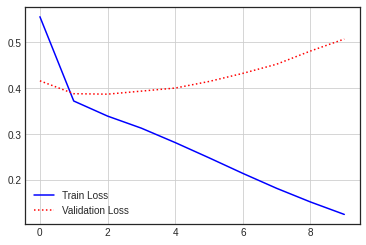

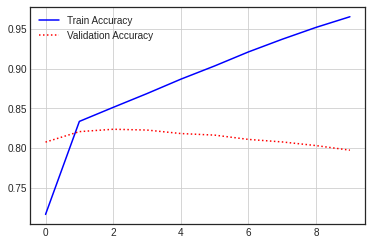

In [19]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
hist_dict = history.history
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()


imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정 분석을 수행하세요
 - num_words =2000, max_len=400

In [20]:
# 조건 다르게 다시 가볼게요
num_words = 2000
max_len=400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

In [21]:
# 전처리
pad_x_train2 = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test2 = pad_sequences(x_test, maxlen=max_len, padding='pre')


In [22]:
# 모델 설계
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32,input_length=max_len))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [23]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [24]:
# 모델 학습
history=model.fit(pad_x_train2, y_train,
                 epochs=10,
                 batch_size=32,
                 validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4973 - acc: 0.7524 - val_loss: 0.3302 - val_acc: 0.8664
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2810 - acc: 0.8852 - val_loss: 0.2986 - val_acc: 0.8796
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2286 - acc: 0.9089 - val_loss: 0.3024 - val_acc: 0.8764
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1848 - acc: 0.9319 - val_loss: 0.3261 - val_acc: 0.8750
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1450 - acc: 0.9507 - val_loss: 0.3367 - val_acc: 0.8732
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1081 - acc: 0.9664 - val_loss: 0.3567 - val_acc: 0.8728
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0775 - acc: 0.9794 - val_loss: 0.3789 - val_acc: 0.8700
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

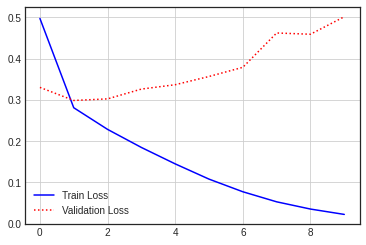

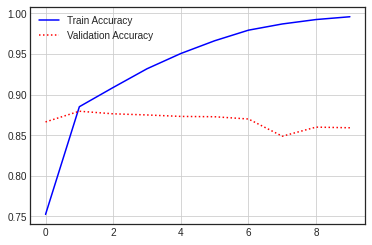

In [25]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

hist_dict = history.history
hist_dict.keys() # dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


plt.plot(hist_dict['loss'], 'b-', label = 'Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label = "Validation Loss")
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label = 'Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label = "Validation Accuracy")
plt.legend()
plt.grid()

plt.show()